In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = r"C:\Users\91939\Downloads\Color\ColorClassification"

In [4]:
# Set parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True 
)
# Display class labels
print(train_generator.class_indices)

Found 97 images belonging to 8 classes.
{'Black': 0, 'Blue': 1, 'Green': 2, 'Violet': 3, 'White': 4, 'orange': 5, 'red': 6, 'yellow': 7}


In [7]:
from tensorflow.keras import layers, models
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax') 
])

In [8]:
from tensorflow.keras import metrics
# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.AUC()])

In [9]:
# Train the model
history = model.fit(train_generator, epochs=20)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.2270 - auc: 0.5319 - loss: 2.1447 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.2399 - auc: 0.7445 - loss: 1.8284 - precision: 0.6553 - recall: 0.1406
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4798 - auc: 0.8530 - loss: 1.5550 - precision: 0.8269 - recall: 0.1303
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5956 - auc: 0.9086 - loss: 1.1812 - precision: 0.8524 - recall: 0.3391
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.7962 - auc: 0.9756 - loss: 0.9878 - precision: 0.7244 - recall: 0.4180  
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7759 - auc: 0.9810 - loss: 0.6232 - precision: 0.9022 - recall: 0.6326
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8185 - auc: 0.9789 - loss: 0.5184 - precision: 0.8472 - recall: 0.7438
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/

In [10]:
# Evaluate the model on validation data
val_loss, val_acc, val_precision, val_recall, val_auc = model.evaluate(train_generator)
# Display the metrics
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Precision: {val_precision * 100:.2f}%")
print(f"Validation Recall: {val_recall * 100:.2f}%")
print(f"Validation AUC: {val_auc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9502 - auc: 0.9988 - loss: 0.1284 - precision: 0.9502 - recall: 0.9502
Validation Loss: 0.10818403959274292
Validation Accuracy: 95.88%
Validation Precision: 95.88%
Validation Recall: 95.88%
Validation AUC: 99.93%


In [11]:
# Save the model
model.save('color__model.h5')

In [12]:
# Save architecture as JSON
model_json = model.to_json()
with open("color_model.json", "w") as json_file:
    json_file.write(model_json)
print("Model architecture saved as JSON")

Model architecture saved as JSON


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


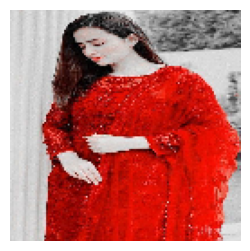

The predicted color is: red


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Load the trained model
model = tf.keras.models.load_model('color__model.h5')
# Compile the model if you need to evaluate or fine-tune it
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define function to predict color of an image
def predict_color(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with the highest probability
    # Return the class label based on the class indices
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the class indices
    return class_labels[predicted_class]  # Return predicted class label
# Predict the color of a new image
image_path = r'C:\Users\91939\OneDrive\Desktop\one.jpg'  # Replace with the path to the test image
predicted_color = predict_color(image_path, model)
# Display the image using matplotlib
img = image.load_img(image_path, target_size=IMG_SIZE)  # Load the image again for display
plt.figure(figsize=(3, 3))  # Optionally specify a size for better viewing
plt.imshow(img)
plt.axis('off')  # Hide axes for cleaner display
plt.show()
# Print the predicted color
print(f"The predicted color is: {predicted_color}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


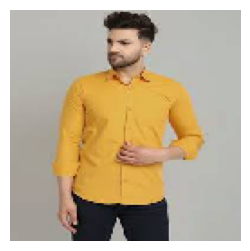

The predicted color is: yellow


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Load the trained model
model = tf.keras.models.load_model('color__model.h5')
# Compile the model if you need to evaluate or fine-tune it
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define function to predict color of an image
def predict_color(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with the highest probability
    # Return the class label based on the class indices
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the class indices
    return class_labels[predicted_class]  # Return predicted class label
# Predict the color of a new image
image_path = r'C:\Users\91939\OneDrive\Desktop\threee.jpg'  # Replace with the path to the test image
predicted_color = predict_color(image_path, model)
# Display the image using matplotlib
img = image.load_img(image_path, target_size=IMG_SIZE)  # Load the image again for display
plt.figure(figsize=(3, 3))  # Optionally specify a size for better viewing
plt.imshow(img)
plt.axis('off')  # Hide axes for cleaner display
plt.show()
# Print the predicted color
print(f"The predicted color is: {predicted_color}")